In [1]:
import pandas as pd
file_path = "../data/dataset/OR_AE2_Project_Adjusted.xlsx"
df_original = pd.read_excel(file_path, engine='openpyxl')
df_original.head()

,Site_Code,Site_Type,Site_X,Site_Y,Site_Loc_GPs,Site_Loc_GP_List,Site_Pop_20miles,Pat_X,Pat_Y,Pat_Loc_GPs,Pat_Loc_GP_List,Drive_Distance_Miles,Driving_Time_mins,Attendance_Type,Age_Group,Wait_Time,Year,Month,Number_Of_Attendances
0,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,2,1
1,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,3,2
2,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,4,3
3,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,5,3
4,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,6,2


In [2]:
df = df_original.loc[df_original.index.repeat(df_original['Number_Of_Attendances'])].reset_index(drop=True)
df = df.drop(columns=['Number_Of_Attendances'])
df.head()

,Site_Code,Site_Type,Site_X,Site_Y,Site_Loc_GPs,Site_Loc_GP_List,Site_Pop_20miles,Pat_X,Pat_Y,Pat_Loc_GPs,Pat_Loc_GP_List,Drive_Distance_Miles,Driving_Time_mins,Attendance_Type,Age_Group,Wait_Time,Year,Month
0,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,2
1,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,3
2,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,3
3,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,4
4,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,00 to 05,New - unplanned,20-39,00-29,1,4


In [3]:
import numpy as np

range_mapping = {
    '00-29': (0, 29),
    '30-59': (30, 59),
    '60-89': (60, 89),
    '90-119': (90, 119),
    '120-149': (120, 149),
    '150-179': (150, 179),
    '180-209': (180, 209),
    '210-239': (210, 239),
    '240-269': (240, 269),
    '270-299': (270, 299),
    '300-329': (300, 329),
    '360+': (360, 420)
}

time_mapping = {
    '00 to 05': (0, 5),
    '05 to 10': (5, 10),
    '10 to 15': (10, 15),
    '15 to 20': (15, 20),
    '20 to 25': (20, 25),
    '25 to 30': (25, 30),
    '30 to 35': (30, 35),
    '35 to 40': (35, 40),
    '40 to 45': (40, 45),
    '45 to 50': (45, 50),
    '50 to 55': (50, 55),
    '55 to 60': (55, 60),
    '60 to 65': (60, 65),
    '65 to 70': (65, 70),
    '70 to 75': (70, 75),
    '75 to 80': (75, 80),
    '80 to 85': (80, 85),
    '85 to 90': (85, 90)
}

def random_uniform_from_range(value, mapping):
    if pd.isna(value) or value not in mapping:
        return np.nan
    low, high = mapping[value]
    return np.random.randint(low, high + 1) 


df['Driving_Time_mins'] = df['Driving_Time_mins'].apply(lambda x: random_uniform_from_range(x, time_mapping))
df['Wait_Time'] = df['Wait_Time'].apply(lambda x: random_uniform_from_range(x, range_mapping))
df.head()


,Site_Code,Site_Type,Site_X,Site_Y,Site_Loc_GPs,Site_Loc_GP_List,Site_Pop_20miles,Pat_X,Pat_Y,Pat_Loc_GPs,Pat_Loc_GP_List,Drive_Distance_Miles,Driving_Time_mins,Attendance_Type,Age_Group,Wait_Time,Year,Month
0,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,4,New - unplanned,20-39,29,1,2
1,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,2,New - unplanned,20-39,1,1,3
2,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,3,New - unplanned,20-39,16,1,3
3,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,0,New - unplanned,20-39,3,1,4
4,2,ED,39785,114688,50,210000,1814482,38971,114101,0,0,00 to 05,2,New - unplanned,20-39,14,1,4


In [4]:
df['Total_Time'] = df['Wait_Time'] + df['Driving_Time_mins']

In [5]:
data = np.load('../data/results/best_site_data.npz')
best_new_site = data['best_new_site']
print(f"Variables successfully loaded\n- Best New Site: {best_new_site}")

Variables successfully loaded
- Best New Site: [[ 10640.01507538 105690.53768844]]


In [6]:
import pickle

# %% Caricamento dei dati relativi ai poligoni delle aree associate ai postcodes
with open('../data/results/voronoi_data.pkl', 'rb') as f:
    voronoi_data = pickle.load(f)

In [13]:
# %% Import delle librerie necessarie
from shapely.geometry import Point, Polygon

# %% Ottieni i postcodes unici
unique_postcodes = df[['Pat_X', 'Pat_Y']].drop_duplicates().reset_index(drop=True)

# %% Creazione della mappatura postcode-to-area
def map_postcodes_to_areas(unique_postcodes, finite_polygons):
    """
    Associa i postcodes unici ai poligoni finiti e salva i postcodes non mappati separatamente.
    """
    postcode_to_polygon = {}
    unmapped_postcodes = []
    polygons = [Polygon(polygon) for polygon in finite_polygons]

    for idx, postcode in unique_postcodes.iterrows():
        postcode_point = Point(postcode['Pat_X'], postcode['Pat_Y'])
        mapped = False
        for poly_idx, poly in enumerate(polygons):
            if poly.contains(postcode_point):
                postcode_to_polygon[(postcode['Pat_X'], postcode['Pat_Y'])] = poly_idx
                mapped = True
                break
        if not mapped:
            unmapped_postcodes.append((postcode['Pat_X'], postcode['Pat_Y']))
    
    return postcode_to_polygon, unmapped_postcodes

# Carica i poligoni finiti
finite_polygons = voronoi_data['finite_polygons']
postcode_to_polygon_map, unmapped_postcodes = map_postcodes_to_areas(unique_postcodes, finite_polygons)

# Salva i postcodes non mappati separatamente
if unmapped_postcodes:
    print(f"Trovati {len(unmapped_postcodes)} postcodes non mappati. Salvataggio in corso...")
    unmapped_postcodes_df = pd.DataFrame(unmapped_postcodes, columns=['Pat_X', 'Pat_Y'])
    unmapped_postcodes_df.to_csv('../data/processing/unmapped_postcodes.csv', index=False)
    print("Postcodes non mappati salvati in '../data/results/unmapped_postcodes.csv'")
else:
    print("Tutti i postcodes sono stati mappati con successo.")


Trovati 12 postcodes non mappati. Salvataggio in corso...
Postcodes non mappati salvati in '../data/results/unmapped_postcodes.csv'


In [14]:
# %% Applicazione della mappatura ai pazienti
def assign_patients_to_polygons(df, postcode_to_polygon_map):
    """
    Assegna ciascun paziente al poligono corretto utilizzando la mappatura dei postcodes.
    """
    df['Polygon_Index'] = df.apply(
        lambda row: postcode_to_polygon_map.get((row['Pat_X'], row['Pat_Y']), np.nan),
        axis=1
    )
    return df

df = assign_patients_to_polygons(df, postcode_to_polygon_map)
df.head()

# %% Salvataggio in un file Pickle
df.to_pickle('../data/processing/patients_with_polygon_mapping.pkl')

In [15]:
import random

def generate_random_point_within_polygon(polygon):
    """
    Genera un punto casuale all'interno di un dato poligono.
    """
    minx, miny, maxx, maxy = polygon.bounds
    while True:
        # Genera una posizione casuale
        random_x = random.uniform(minx, maxx)
        random_y = random.uniform(miny, maxy)
        random_point = Point(random_x, random_y)

        # Controlla se il punto si trova dentro il poligono
        if polygon.contains(random_point):
            return random_point


In [16]:
from shapely.geometry import Point

# %% Distribuzione uniforme dei pazienti nei poligoni
def distribute_patients(df, finite_polygons):
    """
    Distribuisce uniformemente i pazienti nei poligoni associati al loro codice postcode
    (Pat_X, Pat_Y) mantenendo la distribuzione all'interno del poligono.
    """
    
    distributed_patients = []

    # Aggiungi un campo per la posizione uniforme distribuita
    for i, group in df.groupby('Polygon_Index'):
        print(f"Working on postcode {int(i+1)}")
        if group['Polygon_Index'].isna().all():
            continue
        
        # Recupera il poligono associato a questo gruppo
        poly_idx = int(group['Polygon_Index'].iloc[0])
        polygon = Polygon(finite_polygons[poly_idx])

        # Per ogni paziente in questo gruppo, distribuisci uniformemente la sua posizione
        for _, row in group.iterrows():
            
            # Distribuisci uniformemente una nuova posizione all'interno del poligono
            while True:
                # Genera un punto casuale all'interno del poligono
                random_point = generate_random_point_within_polygon(polygon)
                if polygon.contains(random_point):
                    # Aggiungi la nuova posizione al paziente
                    new_row = row.copy()
                    new_row['Pat_X'] = random_point.x
                    new_row['Pat_Y'] = random_point.y
                    distributed_patients.append(new_row)
                    break

    # Ritorna il DataFrame con le nuove posizioni distribuite
    return pd.DataFrame(distributed_patients)

In [18]:
# Applicare la funzione ai pazienti
df = distribute_patients(df, finite_polygons)

# %% Salvataggio in un file Pickle
df.to_pickle('../data/processing/patients_with_distributed_positions.pkl')

df.head()

Working on postcode 1
Working on postcode 2
Working on postcode 3
Working on postcode 4
Working on postcode 5
Working on postcode 6
Working on postcode 7
Working on postcode 8
Working on postcode 9
Working on postcode 10
Working on postcode 11
Working on postcode 12
Working on postcode 13
Working on postcode 14
Working on postcode 15
Working on postcode 16
Working on postcode 17
Working on postcode 18
Working on postcode 19
Working on postcode 20
Working on postcode 21
Working on postcode 22
Working on postcode 23
Working on postcode 24
Working on postcode 25
Working on postcode 26
Working on postcode 27
Working on postcode 28
Working on postcode 29
Working on postcode 30
Working on postcode 31
Working on postcode 32
Working on postcode 33
Working on postcode 34
Working on postcode 35
Working on postcode 36
Working on postcode 37
Working on postcode 38
Working on postcode 39
Working on postcode 40
Working on postcode 41
Working on postcode 42
Working on postcode 43
Working on postcode 

,Site_Code,Site_Type,Site_X,Site_Y,Site_Loc_GPs,Site_Loc_GP_List,Site_Pop_20miles,Pat_X,Pat_Y,Pat_Loc_GPs,Pat_Loc_GP_List,Drive_Distance_Miles,Driving_Time_mins,Attendance_Type,Age_Group,Wait_Time,Year,Month,Total_Time,Polygon_Index
711129,1,ED,4258,124892,75,330000,341047,20613.957565,137585.991255,5,26800,25 to 30,NaN,New - unplanned,20-39,NaN,4,7,NaN,0.0
711130,1,ED,4258,124892,75,330000,341047,20456.895336,133069.132932,5,26800,25 to 30,NaN,New - unplanned,20-39,NaN,4,7,NaN,0.0
711131,1,ED,4258,124892,75,330000,341047,25492.342972,129184.497939,5,26800,25 to 30,NaN,New - unplanned,20-39,NaN,4,7,NaN,0.0
711132,1,ED,4258,124892,75,330000,341047,18769.514822,136226.749698,5,26800,25 to 30,NaN,New - unplanned,20-39,NaN,4,7,NaN,0.0
711133,1,ED,4258,124892,75,330000,341047,17788.753763,130985.628106,5,26800,25 to 30,NaN,New - unplanned,20-39,NaN,4,7,NaN,0.0


In [27]:
len(df)

1707511

Polygons ready!


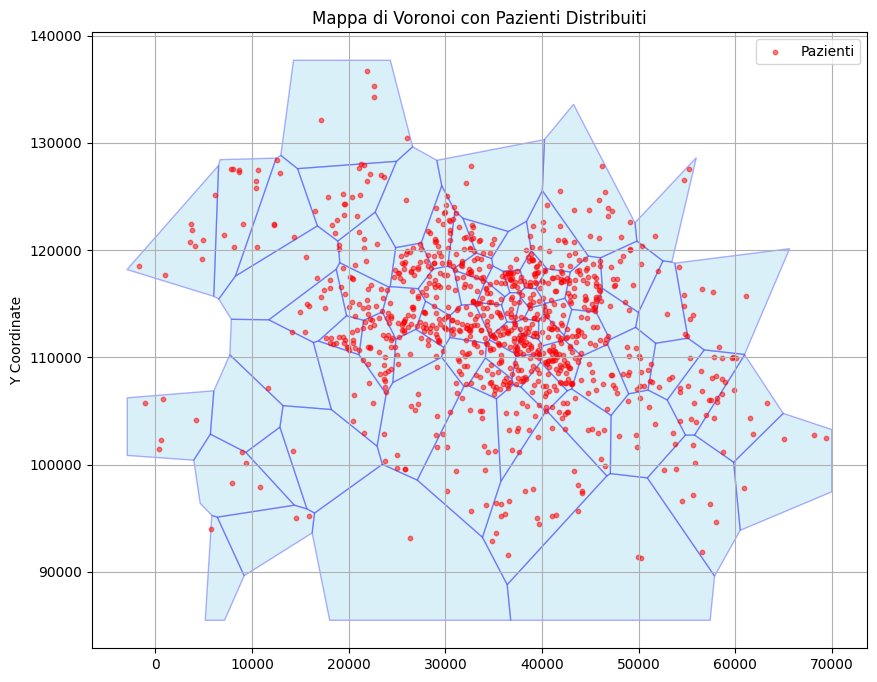

In [24]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point
import numpy as np

# %% Funzione per tracciare la mappa di Voronoi
def plot_voronoi(finite_polygons, patients_assigned=None):
    """
    Traccia la mappa di Voronoi e i pazienti distribuiti all'interno dei poligoni.
    
    Parameters:
        finite_polygons (list): Lista di poligoni della mappa di Voronoi.
        patient_coords (DataFrame): Coordinate dei pazienti (Pat_X, Pat_Y).
        patients_assigned (optional, DataFrame): Pazienti assegnati alle aree se disponibili.
    """
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plotta tutti i poligoni della mappa di Voronoi
    for poly in finite_polygons:
        x, y = poly.exterior.xy
        ax.fill(x, y, alpha=0.3, facecolor='skyblue', edgecolor='blue')
    print("Polygons ready!")

    # Plotta i pazienti se disponibili
    if patients_assigned is not None:
        ax.scatter(patients_assigned['Pat_X'], patients_assigned['Pat_Y'], c='red', label='Pazienti', s=10, alpha=0.5)
     
    ax.set_ylabel('Y Coordinate')
    ax.set_title('Mappa di Voronoi con Pazienti Distribuiti')
    plt.legend()
    plt.grid(True)
    plt.show()

# %% Estrazione di un campione di 1000 pazienti
sampled_patients = df.sample(n=1000, random_state=42)  # Assicurati che df contenga il dataframe con i pazienti

# %% Esegui il plotting solo per i pazienti campionati
plot_voronoi(finite_polygons, sampled_patients[['Pat_X', 'Pat_Y']])


In [25]:
# Analisi e aggiornamento dei dipartimenti
from scipy.spatial.distance import cdist

# Conteggio dei pazienti per dipartimento
patients_per_site = df.groupby('Site_Code').size()
patients_per_site

Site_Code
1      89165
2     276855
3      45337
4     190728
5     222627
6      59335
7     131977
8     180793
9       7877
10     73069
11    429748
dtype: int64

In [26]:
# Calcolo del Total Time medio per dipartimento
mean_total_time_per_site = df.groupby('Site_Code')['Total_Time'].mean()
mean_total_time_per_site

Site_Code
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
Name: Total_Time, dtype: float64

In [28]:
# Aggiunta del nuovo dipartimento
df_new_site = pd.DataFrame({
    'Site_Code': 12,
    'Site_X': best_new_site[0][0],
    'Site_Y': best_new_site[0][1]
}, index=[0])

# Unione con il DataFrame originale dopo aver eliminato i duplicati
df_combined = pd.concat([
    df[['Site_Code', 'Site_X', 'Site_Y']].drop_duplicates(),
    df_new_site
], ignore_index=True)

df_combined

,Site_Code,Site_X,Site_Y
0,2,39785.000000,114688.000000
1,4,37920.000000,110782.000000
2,3,40877.000000,117868.000000
3,7,34629.000000,117035.000000
4,5,33369.000000,114746.000000
5,1,4258.000000,124892.000000
6,11,27024.000000,111909.000000
7,8,40269.000000,103066.000000
8,10,54562.000000,114442.000000
9,6,57894.000000,104081.000000


In [29]:
# Unione delle coordinate dei pazienti e dei siti
site_coords = df_combined
patient_coords = df[['Pat_X', 'Pat_Y']]

In [31]:
# Riassegnazione dei pazienti al dipartimento più vicino
distance_matrix = cdist(patient_coords, site_coords[['Site_X', 'Site_Y']])
nearest_sites = np.argmin(distance_matrix, axis=1)
df['Nearest_Site'] = site_coords.iloc[nearest_sites].reset_index(drop=True)['Site_Code']

0          2
4532       7
10183      1
114531     3
309704     4
432321     5
628859     9
629855     8
643172    12
657542    11
713667    10
716504     6
Name: Nearest_Site, dtype: int64

In [35]:
#Ricalcolo del Total Time per dipartimento
new_patients_per_site = df.groupby('Nearest_Site').size()
new_total_time_per_site = df.groupby('Nearest_Site')['Total_Time']
new_mean_total_time_per_site = df.groupby('Nearest_Site')['Total_Time']

In [24]:


# Calcolo del Total Time del nuovo dipartimento
new_site_patients = df[df['Nearest_Site'] == 'New_Site']
new_site_total_time = new_site_patients['Total_Time'].mean() * (1 - average_percent_decrease)

print(f"Average Percent Decrease: {average_percent_decrease:.2%}")
print(f"New Site Total Time (Adjusted): {new_site_total_time:.2f}")

KeyError: "['New_Site'] not in index"

In [ ]:
# Conto per ogni dipartimento (Site_Code) quanti pazienti ha 
# Raggruppo il total time per ogni dipartimento
# Calcolo lo total time medio per dipartimento considerato il numero di persone al suo interno.
# Aggiungo il nuovo dipartimento.
# Ricalcolo il numero di pazienti assegnati per dipartimento a seconda della distanza euclidea usanodo le variabili Pat_X, Pat_Y, Site_X, Site_y
# Ricalcolo il total time per ogni dipartimento usando i pazienti appena assegnati
# Calcolo il total time di tutti i dipartimenti pre-esistenti dividendo per il numero originale di pazienti di ogni dipartimento, non il numero attuale
# Calcolo la percentuale media di decrescita del total time.
# Calcolo il total time del nuovo dipartimento usando i pazienti appena assegnati e poi diminuisco della percentuale media di descrescita.
# L'idea è che quei pazienti ora hanno total time zero e quindi si può mediare.